In [1]:
import plotly.express as px
import plotly.subplots as sp
import pandas as pd
import plotly.io as pio
pio.renderers.default = "browser"

In [2]:
df = pd.read_csv("./wrangled/greenBuildings.csv")
postal = pd.read_csv("./wrangled/postalToDist.csv")
df["postal"].dtype
df["Postal Sect"] = (df["postal"]-(df["postal"]%10000))/10000
df["Postal Sect"]=df["Postal Sect"].astype(int)
df=pd.merge(df,postal[["Postal Sect","Postal Dist"]],on="Postal Sect")
df

,Unnamed: 0,buildingaddress,buildingsize,greenmarkrating,EUI,year,postal,latitude,longtitude,Postal Sect,Postal Dist
0,0,"137 MARKET STREET, SINGAPORE 048943",Small,GoldPlus,115.420000,2020,48943,1.282230,103.850519,4,1
1,1,"137 MARKET STREET, SINGAPORE 048943",Small,GoldPlus,165.521763,2019,48943,1.282230,103.850519,4,1
2,18,"1 ROBINSON ROAD, SINGAPORE 048542",Large,Certified,191.060000,2020,48542,1.281980,103.851115,4,1
3,19,"1 ROBINSON ROAD, SINGAPORE 048542",Large,Certified,217.506350,2019,48542,1.281980,103.851115,4,1
4,38,"50 RAFFLES PLACE, SINGAPORE 048623",Large,GoldPlus,211.030000,2020,48623,1.284698,103.852133,4,1
...,...,...,...,...,...,...,...,...,...,...,...
508,484,"11 JALAN PENJARA, SINGAPORE 149380",Uknown,Certified,96.596365,2019,149380,1.298151,103.808045,14,3
509,503,"501 STIRLING ROAD, SINGAPORE 148951",Uknown,GoldPlus,111.617440,2019,148951,1.296767,103.801667,14,3
510,487,"461 CLEMENTI ROAD, SINGAPORE 599491",Uknown,GoldPlus,147.154701,2019,599491,1.329585,103.776237,59,21
511,492,"535 CLEMENTI ROAD, SINGAPORE 599489",Uknown,GoldPlus,81.397564,2019,599489,1.331693,103.773907,59,21


<AxesSubplot:>

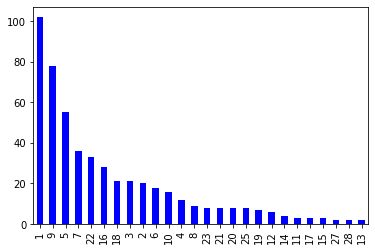

In [3]:
df["Postal Dist"].value_counts().plot.bar(color='blue')
# most buildings are at dist 1, 9, 5 and 7 which are in the central area

In [4]:
fig = px.scatter_mapbox(df[df["year"]==2019], 
                        lat="latitude", 
                        lon="longtitude", 
                        hover_name="buildingaddress", 
                        hover_data=["buildingaddress", "EUI"],
                        color="EUI",
                        color_continuous_scale="thermal_r", # reverse the scale
                        zoom=8)

fig.update_layout(mapbox_style="carto-darkmatter")
fig.update_layout(
    width=1500, height=900
)
fig.show()

In [5]:
fig = px.scatter_mapbox(df[df["year"]==2020], 
                        lat="latitude", 
                        lon="longtitude", 
                        hover_name="buildingaddress", 
                        hover_data=["buildingaddress", "EUI"],
                        color="EUI",
                        color_continuous_scale="thermal_r", # reverse the scale
                        zoom=8)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(
    width=1500, height=900
)
fig.show()